# 1.1 지도 학습

지도학습은 샘플(observation)에 대응하는 타깃(예측하는 값)의 정답을 제공하는 방식을 말합니다.

지도 학습 시스템의 주요 개념을 6개로 나눌 수 있습니다.

1. 샘플 : 샘플은 예측에 사용하는 아이템입니다. 샘플은 x로 표시합니다. 이따금 샘플을 "입력"이라고 부릅니다.

2. 타깃 : 타깃은 샘플에 상응하는 레이블 입니다. 일반적으로 예측되는 대상입니다. 머신러닝/딥러닝의 표준적인 표기법에 따라 y로 나타냅니다. 이따금 타깃을 "정답"이라고 부릅니다.

3. 모델 : 모델은 수학식이나 샘플 x를 받아 타깃 레이블 값을 예측하는 함수입니다.

4. 파라미터 : 파라미터는 이따금 "가중치"라고도 부릅니다. 파라미터가 모델을 규정합니다. 기본적으로 가중치를 의미하는 w 또는 w^을 사용합니다.

5. 예측 : 예측은 모델이 추측하는 타깃값입니다. "추정"이라고도 부릅니다. "햇(^)" 표기를 사용해 나타냅니다. 예를 들어 타깃 y의 예측은 y^으로 표기합니다.

6. 손실 함수 : 손실함수는 훈련 데이터에 대한 예측이 얼마나 멀리 떨어져 있는지 비교하는 함수입니다. 타깃과 예측이 주어지면 손실 함수는 "손실"이라 부르는 실수 스칼라값을 계산합니다. 손실이 낮을수록 예측을 더 잘하는 모델입니다. 손실 함수는 L로 표기합니다.

# 1.2 샘플과 타깃의 인코딩

샘플(텍스트)을 머신러닝 알고리즘에 사용하려면 수치로 표현해야 합니다.

수치 벡터는 텍스트를 표현하는 간단한 방법입니다. 

# 1.2.1 원-핫 표현

원-핫 표현은 0 벡터에서 시작해 문장이나 문서에 등장하는 단어에 상응하는 원소를 1로 설정합니다.

ex) "Time flies like an arrow." , "Fruit flies like a banana."

문장을 토큰으로 나누고 구두점을 무시한 다음 모두 소문자로 바꾸면 어휘사전크기는 8이 됩니다. {time, fruit, flies, like , a, an, arrow, banana}

각 단어를 8차원 원-핫 벡터로 표현 할 수 있습니다.

time fruit flies like a an arrow banana

1     0      0     0  0  0   0     0

0     1      0     0  0  0   0     0

0     0      1     0  0  0   0     0

0     0      0     1  0  0   0     0

0     0      0     0  1  0   0     0

0     0      0     0  0  1   0     0

0     0      0     0  0  0   1     0

0     0      0     0  0  0   0     1

이진 인코딩으로 "like a banana"를 나타내면 {0,0,0,1,1,0,0,1} 입니다.

# 1.2.2 TF 표현

구, 문장, 문서의 TF 표현은 단순히 소속 단어의 원-핫 표현을 합해 만듭니다.

예를 들어, 원-핫 인코딩 방식을 사용한 "Fruit flies like time flies a fruit"의 TF 표현은 [1,2,2,1,1,0,0,0] 각 원소는 해당 단어가 문장에 등장하는 횟수입니다.

단어 w의 TF는 TF(w)라고 표기합니다.

C:\Users\camar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

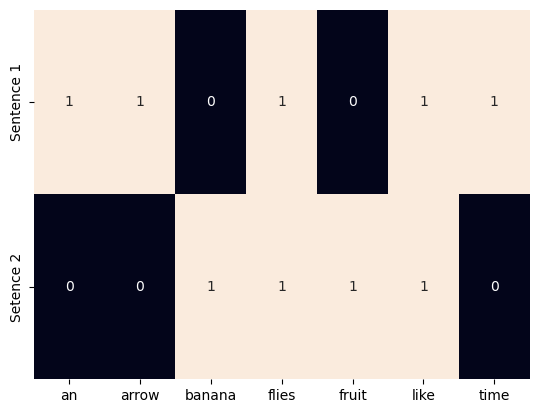

In [1]:
# 코드 1-1 사이킷런을 사용하여 원-핫 벡터 또는 이진 표현 만들기

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ["Time flies like an arrow.",
          "Fruit flies like a banana."]
one_hot_vectorizer = CountVectorizer(binary = True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names()
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab,
            yticklabels=["Sentence 1", "Setence 2"])

# 1.2.3 TF-IDF 표현

IDF는 벡터 표현에서 흔한 토큰의 점수를 낮추고 드문 토큰의 점수를 높입니다. 토큰 w의 IDF(w)는 말뭉치 하나를 다음과 같이 정의 합니다.

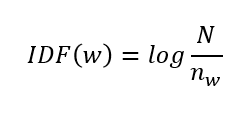

n_w는 단어 w를 포함한 문서의 개수이고, N은 전체 문서 개수입니다. TF-IDF 점수는 TF와 IDF를 곱한 TF(w)*IDF(w)입니다.

모든 문서에 등장하는 (n_w = N) 매우 흔한 단어는 IDF(w)가 0 이고, TF-IDF점수가 0 입니다. 단어가 한 문서에만 등장하는 것 처럼 아주 드물면 IDF는 최댓값 log N 이 됩니다.

<AxesSubplot:>

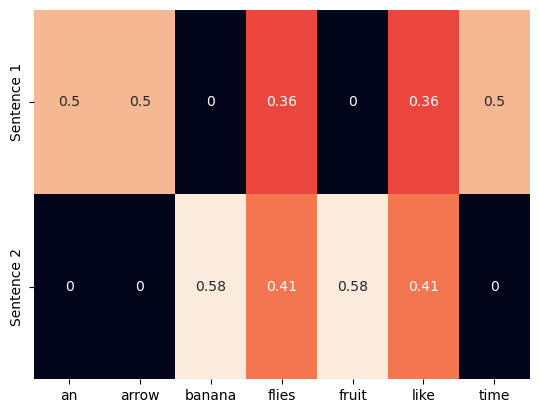

In [2]:
# 코드 1-2 사이킷런을 사용해 TF-IDF 표현 만들기

from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels= [ 'Sentence 1', 'Sentence 2'])

# 1.2.4 타깃 인코딩

일부 NLP문제는 주어진 텍스트에서 수치를 예측합니다. 예를 들어 어떤 수필에 숫자 등급이나 가독성 점수를 매겨야 하거나, 음식 리뷰의 소수점 첫째 자리까지 평점을 예측해야 할 수 있습니다.

수치 타깃을 인코딩 하는 방법은 몇 가지가 있습니다. 간단히 타깃을 '0-18', '19-25', '25-30' 과 같은 범주형 "구간"으로 바꾸고, 순서가 있는 분류 문제로 다루는 방법이 있습니다. 구간은 균등하지 않아도 되며, 데이터에 따라 나눌 수 있습니다.

이런 경우 타깃 인코딩이 성능에 아주 큰 영향을 미치니 주의를 기울여야 합니다.

# 1.3 계산 그래프

모델(수학식)은 입력을 변환해서 예측을 얻습니다. 손실 함수(또 다른 수학식)는 모델의 파라미터를 조정하는 피드백 신호를 제공합니다.

계산 그래프 데이터 구조를 사용하면 이런 데이터 흐름을 간편하게 구현할 수 있습니다. 기술적으로 보면 계산 그래프는 수학식을 추상적으로 모델링한 것입니다.